First, import the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multitest import multipletests
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.proportion as proportion

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno


%matplotlib inline

Read in the data and define necessary functions for analysis.

The data can be found here (scroll down to "RWAS" on the right): https://openpsychometrics.org/_rawdata/

In [ ]:
auth = pd.read_csv('data.csv', low_memory=False, sep=',')

In [ ]:
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 300)

Beginning notes about our data:

Our survey data is rich.  Each respondent was asked to complete the 22-question Right Wing Authoritarian Survey (RWAS), a 10-question personality test, a 16-question vocabulary test (wherein respondents were asked to answer "yes" or "no" to whether they knew the definitions of certain words...and 3 words out of the 16 were made-up, to function as a validity test), and several demographic questions.  Also included within the data are the times, in seconds, that each respondent took to answer each of the RWAS questions, as well as several other measures.

Let's see what our data looks like.

In [ ]:
auth.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19,E20,E21,E22,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,IP_country,education,urban,gender,engnat,age,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,surveyaccurate,major
0,4,1,1,9,3,9,2,7,8,1,9,1,9,1,9,1,1,9,2,9,9,1,17583,4045,3816,3491,13719,8359,5500,3401,4528,4348,4227,3638,6726,3155,6133,4028,5164,3581,5102,2363,2407,12948,8,129,124,6,3,4,5,6,2,7,6,5,2,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,GB,3,2,1,1,18,1366,768,1,4,3,4,1,1,2,1,psychology
1,3,2,1,8,2,7,1,8,9,3,7,5,9,2,9,1,1,8,1,7,7,1,17948,5196,8944,4384,6543,10897,8321,3545,5480,9248,16104,5386,18258,3987,6478,5139,9265,14259,7735,5875,9603,6478,2,193,158,6,3,6,4,7,3,7,4,4,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,US,4,1,1,1,62,768,1024,1,6,2,4,1,2,3,1,History
2,1,6,7,9,3,9,9,4,9,9,8,9,9,8,9,2,9,3,5,7,9,9,11218,11207,12510,7504,12409,12231,15495,7360,11999,13977,10504,5951,11704,10663,8000,9591,14150,11688,12240,11567,4808,9647,5,238,163,1,7,7,6,6,7,2,4,1,1,1,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,PL,1,2,1,2,16,1280,800,1,2,1,4,2,1,2,1,NaN
3,1,1,1,8,1,8,1,9,9,1,9,2,8,1,8,1,1,9,1,9,9,1,6572,4642,6221,7451,5990,6841,11241,5271,7541,4521,5710,6261,10131,4321,7521,4960,6831,5621,5581,3550,4451,7340,3,140,137,3,6,1,6,6,5,4,1,3,1,1,1,1,1,1,1,0,0,0,1,0,0,1,1,1,1,CA,3,2,2,1,59,1366,768,1,10,1,4,2,3,3,1,public relations
4,1,1,1,3,1,9,1,1,7,1,9,2,9,5,9,1,1,3,1,9,4,1,11437,3304,4096,5928,6616,315545,5600,4064,7008,6304,4461,5291,9496,3977,5343,5912,5857,13103,6368,5688,7920,10048,2442,455,115,1,7,2,7,3,7,1,5,1,7,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,GB,2,3,2,1,49,1280,720,3,2,1,4,1,1,1,1,NaN


In [ ]:
auth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9881 entries, 0 to 9880
Data columns (total 90 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Q1              9881 non-null   int64 
 1   Q2              9881 non-null   int64 
 2   Q3              9881 non-null   int64 
 3   Q4              9881 non-null   int64 
 4   Q5              9881 non-null   int64 
 5   Q6              9881 non-null   int64 
 6   Q7              9881 non-null   int64 
 7   Q8              9881 non-null   int64 
 8   Q9              9881 non-null   int64 
 9   Q10             9881 non-null   int64 
 10  Q11             9881 non-null   int64 
 11  Q12             9881 non-null   int64 
 12  Q13             9881 non-null   int64 
 13  Q14             9881 non-null   int64 
 14  Q15             9881 non-null   int64 
 15  Q16             9881 non-null   int64 
 16  Q17             9881 non-null   int64 
 17  Q18             9881 non-null   int64 
 18  Q19     

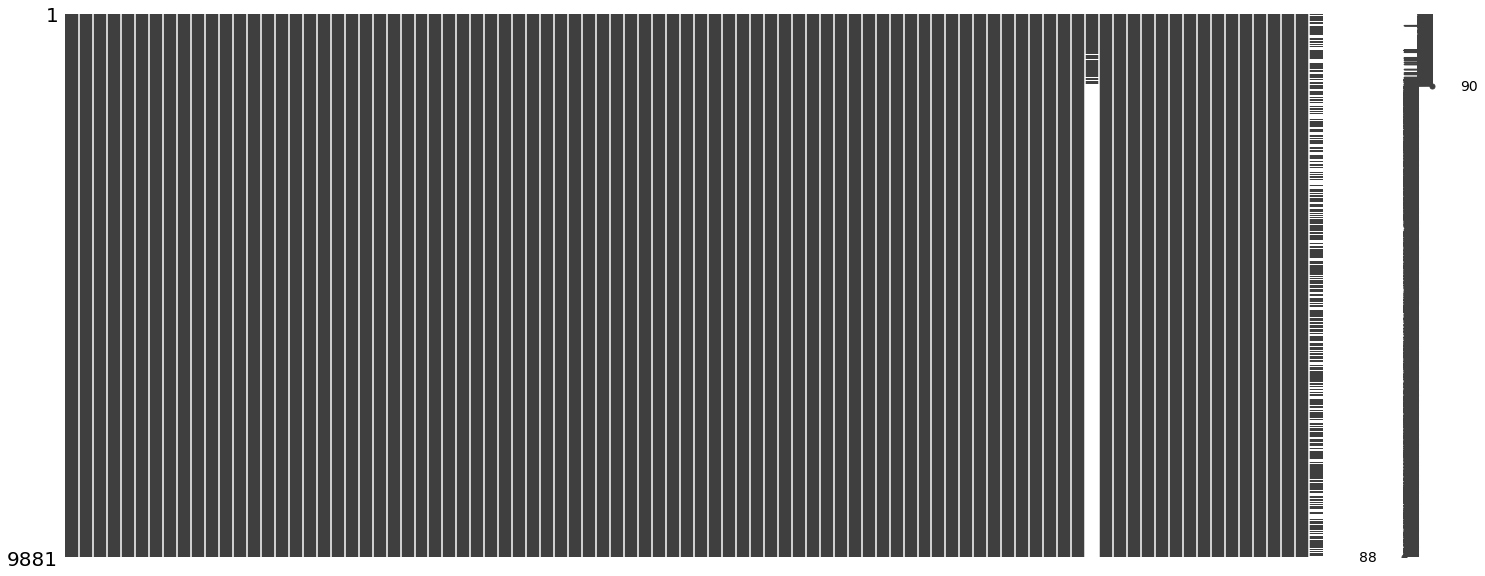

In [ ]:
msno.matrix(auth)
plt.show()

In [ ]:
round(auth.isnull().sum().sort_values(ascending=False)/len(auth)*100,2)

,Total,Percent
IP_country,8670,87.74
major,3423,34.64


In [ ]:
auth['IP_country'].value_counts()

US    676
GB    117
CA     71
AU     46
DE     18
BR     17
GR     16
PL     16
AT     11
FR     11
SE     10
PT     10
NL     10
PH     10
SG     10
IN      9
IE      9
NO      8
ID      8
ES      7
NZ      7
TR      7
IT      7
ZA      7
RS      6
CZ      5
MY      5
AR      5
FI      5
RO      4
HR      4
BE      3
AE      3
TH      3
BG      3
CL      3
IL      3
RU      2
MX      2
CO      2
ZM      2
DK      2
UY      2
HU      2
JP      2
CH      2
IM      1
IS      1
SN      1
ZW      1
SI      1
MD      1
LT      1
BD      1
KH      1
TW      1
UA      1
MK      1
LK      1
VE      1
SA      1
EE      1
CY      1
LA      1
LV      1
HK      1
CN      1
KE      1
KR      1
Name: IP_country, dtype: int64

Clearly, the IP_country field is not usable due to the large amount of missing data.  Only confirmed users from the US and perhaps Great Britain total enough observations to perform an analysis.  If we were to confine the analysis to people from the United States, or perhaps the Anglosphere (US, Great Britain, Canada, Australia), we would lose a lot of observations from test-takers that probably did hail from those places anyway.  And according to Bob Altermeyer, author of "The Authoritarians" and the creator of the test used in this dataset, authoritarian psychology is a global phenomenon.



In [ ]:
auth['major'].value_counts()

psychology                           271
History                              236
English                              216
Psychology                           191
Computer Science                     180
                                    ... 
Graphic design                         1
English Literature and Philosophy      1
technical engineering                  1
History and Politics                   1
Art of Wars: tactics                   1
Name: major, Length: 1709, dtype: int64

A quick scan through this list reveals that the number of unique majors is not as great as its length might indicate.  Many people misspelled their major names or just stated them differently.  I don't have the the time to go through and correct all this.  Also, the dataset already contains an 'education' column that captures educational attainment.

In [ ]:
auth.describe().T

,count,mean,std,min,25%,50%,75%,max
Q1,9881.0,3.383463,2.187470e+00,0.0,2.0,3.0,5.0,9.0
Q2,9881.0,2.105556,2.082531e+00,0.0,1.0,1.0,2.0,9.0
Q3,9881.0,2.723307,2.542981e+00,0.0,1.0,1.0,3.0,9.0
Q4,9881.0,7.541544,2.405947e+00,0.0,7.0,9.0,9.0,9.0
Q5,9881.0,2.953142,2.117866e+00,0.0,1.0,2.0,4.0,9.0
Q6,9881.0,7.447222,2.289006e+00,0.0,7.0,9.0,9.0,9.0
Q7,9881.0,2.866410,2.535730e+00,0.0,1.0,2.0,4.0,9.0
Q8,9881.0,6.671794,2.420071e+00,0.0,5.0,7.0,9.0,9.0
Q9,9881.0,7.509159,2.032813e+00,0.0,7.0,8.0,9.0,9.0
Q10,9881.0,3.207165,2.639795e+00,0.0,1.0,2.0,5.0,9.0


<u><b>Let's filter out the "bad" observations from the dataset:</b></u>

1. The authoritarianism exam covered columns Q1 - Q22 (but Q1 and Q2 were not part of the score).  Note from above that each question in those columns has a min of "0" -- in a survey where every question is graded 1 - 9.  Some users skipped questions.  We will eliminate every test taker that skipped more than 4 questions out of those 20.  For those that missed 4 or less, that value in the dataset will be replaced by the mean for that question.


2. The ten question personality exam covered columns TIPI1 - TIPI10.  "0" scores indicate a question was missed.  We will eliminate every test taker that missed more than 2 questions out of those 10.  For those that missed 2 or less, that value in the dataset will be replaced by the mean for that question.


3. All test-takers with "0" scores in the education, 'urban', 'gender', 'engnat', 'hand', 'religion', 'orientation', 'voted', 'married', or 'familysize' columns will have their responses replaced with the modal answer for that category -- provided that they missed no more than 2 questions.



Let's remove those rows which have too many zeros in the Q2 - Q22 columns and TIPI - TIPI10 columns.

In [ ]:
##Let's first get an idea of the extent of the problem:
zero_set = {0}
rng_zero_q = list(range(2,22))
rng_zero_t = list(range(47,57))

auth['number_zeroes_q'] = auth.iloc[:, rng_zero_q].isin(zero_set).sum(1)
auth['number_zeroes_t'] = auth.iloc[:, rng_zero_t].isin(zero_set).sum(1)

print(auth['number_zeroes_q'].value_counts())
print('-'*40)
print(auth['number_zeroes_t'].value_counts())

0     9689
1      161
2       18
20       5
3        5
6        1
4        1
10       1
Name: number_zeroes_q, dtype: int64
----------------------------------------
0     9756
1       71
10      20
9       13
2        8
7        4
6        3
4        2
3        2
8        2
Name: number_zeroes_t, dtype: int64


In [ ]:
## This command will drop all super-problematic rows:
auth = auth[(auth['number_zeroes_q'] <=4) & (auth['number_zeroes_t'] <= 2)]

print(auth['number_zeroes_q'].value_counts())
print('-'*40)
print(auth['number_zeroes_t'].value_counts())

0    9645
1     161
2      18
3       5
4       1
Name: number_zeroes_q, dtype: int64
----------------------------------------
0    9751
1      71
2       8
Name: number_zeroes_t, dtype: int64


In [ ]:
## Next, I'm going to fill in all those "0" values with Nan to make things easier:
rng_all_qt = rng_zero_q + rng_zero_t

auth[auth.iloc[:, rng_all_qt] == 0] = np.nan

In [ ]:
## This will fill in the NaN values in the Q2 - Q22 columns and TIPI-TIPI10 columns with the means for each column:

auth = auth.fillna(auth.iloc[:, rng_all_qt].mean().round(0))
auth.iloc[:, rng_all_qt] = auth.iloc[:, rng_all_qt].astype(np.int64)

print('Observations left after mean correction for questionnaires:', auth.shape[0])

Observations left after mean correction for questionnaires: 9830


Next, let's handle the zero values in the demographic data.

In [ ]:
## This will give us an idea of the distribution of zero values per row for the demographic data:
rng_dem = list(range(74,78)) + [81, 82, 83, 85, 86,87]
auth['number_zeroes_dem'] = auth.iloc[:, rng_dem].isin(zero_set).sum(1)
print(auth['number_zeroes_dem'].value_counts())

0    9146
1     621
2      47
3       8
4       4
5       2
7       1
6       1
Name: number_zeroes_dem, dtype: int64


In [ ]:
##  Here we see the problem across categories before we start dropping observations:
auth_dem = auth.iloc[:, rng_dem]
print(auth_dem[auth_dem == 0].count())

education      100
urban          112
gender          19
engnat          25
hand            47
religion        71
orientation     94
voted          104
married         39
familysize     167
dtype: int64


We see that the problem is reasonably widely distributed.  This validates our approach of dropping all observations with more than two zero-values in the demographic columns -- test-takers didn't ridiculously favor skipping questions in just one or two particular columns.

In [ ]:
## This command will drop all rows with more than 2 zero-values in the demographic columns:
auth = auth[auth['number_zeroes_dem'] <=2]
auth_dem = auth.iloc[:, rng_dem]
## Now, we can see the problem across categories after we have dropped observations:
print(auth['number_zeroes_dem'].value_counts())
print('-'*40)
print(auth_dem[auth_dem == 0].count())


0    9146
1     621
2      47
Name: number_zeroes_dem, dtype: int64
----------------------------------------
education       95
urban          105
gender          17
engnat          23
hand            40
religion        63
orientation     84
voted           97
married         31
familysize     160
dtype: int64


In [ ]:
## With that done, the following crosstab will dive deeper into the extent of the "0" values problem:
dem_cols = ['education','urban','gender','engnat','hand','religion','orientation','voted','married','familysize']

for dem in dem_cols:
    print(pd.crosstab(auth['number_zeroes_dem'], auth[dem] == 0))
    print('-'*90)

education          False  True 
number_zeroes_dem              
0                   9146      0
1                    532     89
2                     41      6
------------------------------------------------------------------------------------------
urban              False  True 
number_zeroes_dem              
0                   9146      0
1                    529     92
2                     34     13
------------------------------------------------------------------------------------------
gender             False  True 
number_zeroes_dem              
0                   9146      0
1                    605     16
2                     46      1
------------------------------------------------------------------------------------------
engnat             False  True 
number_zeroes_dem              
0                   9146      0
1                    599     22
2                     46      1
---------------------------------------------------------------------------------------

In [ ]:
## We're going to use the same "masking" strategy as before to replace the missing categorical values with the mode from each category:
auth[auth.iloc[:, rng_dem] == 0] = np.nan
auth[dem_cols]=auth[dem_cols].fillna(auth.mode().iloc[0])
auth.iloc[:, rng_dem] = auth.iloc[:, rng_dem].astype(np.int64)

print('Observations left after means correction:', auth.shape[0])


Observations left after means correction: 9814


<u><b>Let's drop the columns that we don't want for our analysis:</b></u>

<b>Q1, Q2:</b> The first two RWAS survey questions don't actually factor into the score.

<b>E1 - E22:</b> These columns show time spent on each RWAS survey question.  

<b>introelapse:</b> Time spent on landing page.

<b>suveyelapse:</b> Time spent answering demographic and personality survey questions.

<b>IP_country:</b> Country of test-taker.  Removed for reasons stated above.

<b>screenw:</b> Screen width.

<b>screenh:</b> Screen height.

<b>race:</b> The race column is unusable due to a coding error in the assessment which placed Whites, Native Americans, and Indigenous Australians into the same "bucket".

<b>surveyaccurate:</b> Not clear what this is, but it has no variation, so it doesn't say anything.

<b>major:</b> College-major.  Removed for reasons stated above.

<b>number_zeroes_q, number_zeroes_t, and number_zeroes_dem:</b> We don't need these anymore.

In [ ]:
## This command will drop all problematic columns:
rng_drop = list(range(22,44)) + [0, 1, 44, 46, 73, 79, 80, 84] + list(range(88,93))
auth = auth.drop(auth.columns[rng_drop], axis=1)
print('Columns left after problematic column drop:',auth.shape[1])

Columns left after problematic column drop: 58


<u><b>Let's filter out the observations that contain unnacceptable "outlier" values.</b></u>

It's clear from the <b>auth.describe.T</b> command above that we have some outliers in this dataset, specifically in the 'age', 'testelapse', and 'familysize' columns.  If we assume those columns to be normally distributed, a z-score cutoff like the one below would normally be sufficient to eliminate the worst offenders

In [ ]:
## The code below will give an idea of what a "z-score approach" would achieve (not much):
auth_z_score = auth[(np.abs(stats.zscore(auth['age'])) < 3) & (np.abs(stats.zscore(auth['familysize'])) < 3) & (np.abs(stats.zscore(auth['testelapse'])) < 3)]
print("Remaining number of rows",auth_z_score.shape[0])
print("Max age is now",auth_z_score.age.max())
print("Max family size is now",auth_z_score.familysize.max())
print("Max test-taking time is now",auth_z_score.testelapse.max()/60,'minutes')

Remaining number of rows 9724
Max age is now 265
Max family size is now 8
Max test-taking time is now 265.6333333333333 minutes


Let's first see if the Z-score approach above was reasonable for the 'familysize' column.

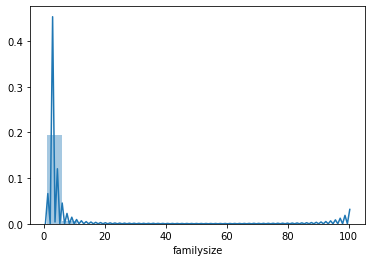

DescribeResult(nobs=9814, minmax=(1, 100), mean=2.651925820256776, variance=4.3942707227144755, skewness=24.58680716766419, kurtosis=1055.6101587945468)


In [ ]:
sns.distplot(auth['familysize'], bins=20)
plt.show()
print(stats.describe(auth['familysize']))

Clearly, this is really bad.  Either some mothers are producing children like the Zerg Overmind, or some folks are just flat out lying.  Let's check the counts.

In [ ]:
print(auth.familysize[auth['familysize'] >= 9].value_counts())
print('-'*30)
print('Total number of test-takers with 8 or more brothers and sisters:',auth.familysize[auth['familysize'] >= 9].value_counts().sum())

9      31
11     10
10     10
12      6
13      4
100     2
69      1
36      1
Name: familysize, dtype: int64
------------------------------
Total number of test-takers with 8 or more brothers and sisters: 65


Based on the above counts, it makes sense to be a little generous and put the cutoff for number of children at 12.  Let's see what the distribution looks like for such a move... 

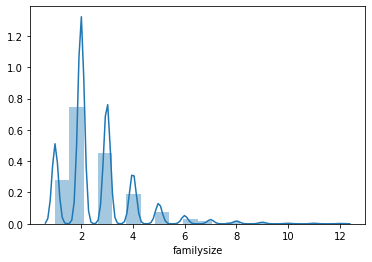

DescribeResult(nobs=9806, minmax=(1, 12), mean=2.617683051193147, variance=1.8575924282430505, skewness=1.8356170069443185, kurtosis=5.932190319756842)


In [ ]:
under_13 = auth.familysize[auth['familysize'] <= 12]

sns.distplot(under_13, bins=20)
plt.show()
print(stats.describe(under_13))

So 12 seems to be a reasonable cutoff.  It should have been clear from above that the Z-score cutoff method produced unacceptable results for the 'age' and 'testelapse' columns (these are probably not normally distributed, with massive outliers).  We will now examine those last two to make a determination as to where to make our outlier cutoffs.

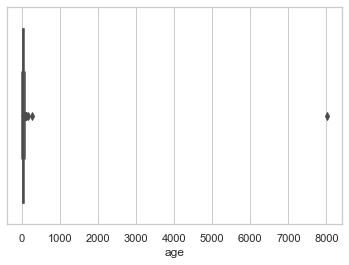

In [ ]:
## The following with show a boxplot of the 'age' column.
sns.set(style="whitegrid")
sns.boxplot(x=auth["age"])
plt.show()

Clearly, we have one massive outlier in the 'age' column, as well as a few others that are more normal.  Let's take a closer look.

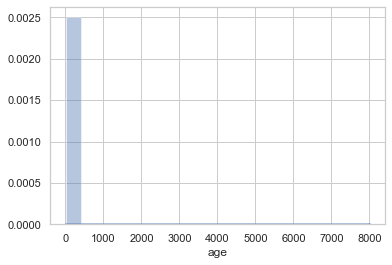

DescribeResult(nobs=9814, minmax=(13, 8008), mean=32.55797839820664, variance=6721.552890073517, skewness=93.8244319841758, kurtosis=9123.889112517862)


In [ ]:
## This code will show the raw age distribution in the dataset:
sns.distplot(auth['age'], bins=20)
plt.show()
print(stats.describe(auth['age']))

In [ ]:
## Here, we will get counts of how many people there are in each age-year above 80:
print(auth.age[auth['age'] > 80].value_counts())
print('-'*30)
print('Total number is',auth.age[auth['age'] > 80].value_counts().sum())

99      2
85      2
81      2
95      1
171     1
265     1
8008    1
87      1
86      1
100     1
83      1
Name: age, dtype: int64
------------------------------
Total number is 14


There are only 11 test-takers over 80 years old.  Given how unlikely it is that anyone over 80 is taking this exam online, even in 2015, we are going to remove these individuals from the dataset and then look at the distribution.  

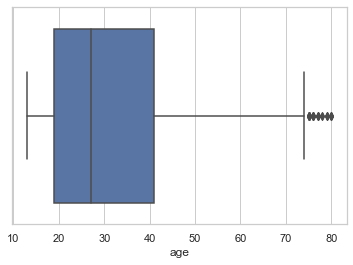

In [ ]:
## The code below will show a boxplot of the age distribution for everyone 80 and younger:
under_81 = auth.age[auth['age'] <= 80]
sns.boxplot(x=under_81)
plt.show()

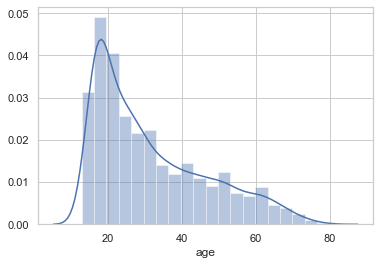

DescribeResult(nobs=9800, minmax=(13, 80), mean=31.642755102040816, variance=227.95022814697873, skewness=0.9075648324473186, kurtosis=-0.17170163429968888)


In [ ]:
## This code shows the distribution of all people under 80 in the dataset:
sns.distplot(under_81, bins=20)
plt.show()
print(stats.describe(under_81))

The distribution is obviously skewed toward young people, with a very long tail.  

Given that this analysis will look at how RWAS scores stack up against a variety of features, it's instructive to note at this point that having age as a feature to predict RWAS scores is probably not a good idea: this was an online test, so the only older people taking the exam (even in 2015) will be those who are computer literate and who actually spend enough time on the internet to stumble onto legitimate psychological exams.  The older folks who took this exam are likely to be much different, demographically, than their peer group.  Therefore, we will drop the 'age' feature from consideration.

Next, we'll investigate the 'testelapse' column.

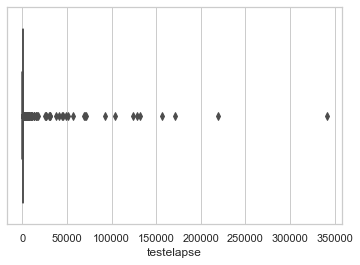

In [ ]:
## The following with show a boxplot of the 'testelapse' column.
sns.boxplot(x=auth["testelapse"])
plt.show()

There are clearly some ridiculous outliers.  Let's look at the distribution of 'testelapse'.  'testelapse' is given in seconds.  Let's put 'testelapse' into categories: 

1 = People who took up to 2.5 min.

2 = People who took between 2.5-7.5 min.

3 = People who took between 7.5-12.5 min.

4 = People who took between 12.5-20 min.

5 = People who took between 20-30 min.

6 = People who took between 30-60 min.

7 = People who took between 60 - infinity minutes.

In [ ]:
elapse_categ = pd.cut(auth['testelapse'],[-1,150,450,750,1200,1800,3600,float('inf')],labels=[1,2,3,4,5,6,7])
elapse_categ.value_counts()

2    7086
1    1640
3     641
4     218
5      88
7      75
6      66
Name: testelapse, dtype: int64

It seems reasonable to eliminate all observations from categories 6 and 7.  Let's look at the resulting distribution.

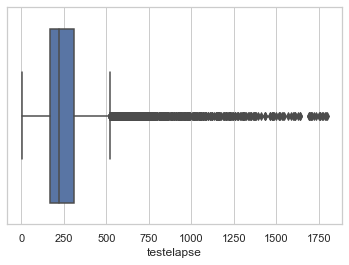

In [ ]:
time_con = auth.testelapse[elapse_categ < 6]
sns.boxplot(x=time_con)
plt.show()

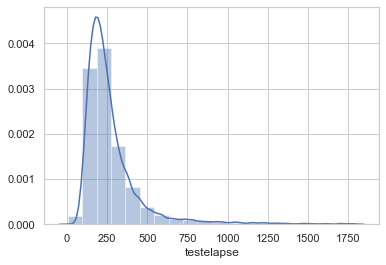

DescribeResult(nobs=9673, minmax=(6, 1796), mean=274.6563630724698, variance=36682.422637598516, skewness=3.378431541871577, kurtosis=15.853254935308037)


In [ ]:
sns.distplot(time_con, bins=20)
plt.show()
print(stats.describe(time_con))

Now we're ready to finally remove all the outliers in our dataset.

In [ ]:
## This command will drop all the troublesome outliers, as well as the 'age' column
auth = auth[(auth['familysize'] <= 12) & (auth['testelapse'] <= 1800)]
auth = auth.drop('age', axis=1)
print("Remaining number of observations after removing outliers:",auth.shape[0])
print('-'*125)
print("Family size stats are now:",stats.describe(auth['familysize']))
print('-'*125)
print("Test-time stats are now:",stats.describe(auth['testelapse']))


Remaining number of observations after removing outliers: 9665
-----------------------------------------------------------------------------------------------------------------------------
Family size stats are now: DescribeResult(nobs=9665, minmax=(1, 12), mean=2.61624418003104, variance=1.8577865959990818, skewness=1.8249802145617913, kurtosis=5.811367170523548)
-----------------------------------------------------------------------------------------------------------------------------
Test-time stats are now: DescribeResult(nobs=9665, minmax=(6, 1796), mean=274.7199172271081, variance=36698.335142377255, skewness=3.378235361610767, kurtosis=15.847716495041027)


Now that we've cleaned our datset, we're ready to add columns representing total scores on measures of authoritarianism and personality.  

Each test taker's scores on the RWAS questions are totaled up and stored in the 'RWAS_score' column.  The higher the RWAS score, the greater a person's authoritarian tendencies.  If a person's RWAS score managed to exceed the 75th percentile for the sample, then this is recorded as a "1" in a new 'High_RWAS' column.  Otherwise, respondents receive a "0".  According to Bob Altemeyer, th 75th percentile is a proper cutoff to isolate those with high authoritarian tendencies.

Here we total up the number of real vocabulary words (out of the 16-question vocabulary test) that each test taker claimed to know -- a result which is stored in the column 'voc_known'.  Also, if someone managed to correctly identify the 3 fake vocabulary words out of the 16 present (by stating that they did not know the definition), then that is recorded as a "1" in a new 'voc_val' column.  Otherwise, respondents receive a "0".

Also, here each respondent's scores on the 10-question personality test are combined to form scores for each of the "Big Five" personality domains (in the manner directed by the psychological literature, though I did adjust the scale to be completely in the positive range for convenience).  A higher score in any of the "Big Five" indicates a greater disposition toward that trait.  A score of "12" in the 'Extrav' column, for instance, indicates high extraversion.

In [ ]:
## First, create the new columns:
auth['Extrav'] = auth['TIPI1'] - auth['TIPI6'] + 7
auth['Agree'] = auth['TIPI7'] - auth['TIPI2'] + 7
auth['Consc'] = auth['TIPI3'] - auth['TIPI8'] + 7
auth['Emo_Stab'] = auth['TIPI9'] - auth['TIPI4'] + 7
auth['Open_Exp'] = auth['TIPI5'] - auth['TIPI10'] + 7

voc_score = list(range(31,36)) + list(range(43,47)) + [37,38,40,41]
auth['voc_known'] = auth.iloc[:,voc_score].sum(axis=1)

rng_score = list(range(0,20))
auth['RWAS_score'] = auth.iloc[:,rng_score].sum(axis=1)
auth['High_RWAS'] = np.where(auth['RWAS_score'] > auth['RWAS_score'].quantile(0.75), 1, 0)


voc_val_score = [36,39,42]
auth['voc_val'] = np.where(auth.iloc[:,voc_val_score].sum(axis=1) > 0, 0, 1)

##Next, drop all the unneccesary columns at this point:

rng_drop_2 = list(range(0,20)) + list(range(21,31)) + list(range(31,47)) 
auth = auth.drop(auth.columns[rng_drop_2], axis=1)

auth.head()

,testelapse,education,urban,gender,engnat,hand,religion,orientation,voted,married,familysize,Extrav,Agree,Consc,Emo_Stab,Open_Exp,voc_known,RWAS_score,High_RWAS,voc_val
0,129,3,2,1,1,1,4,3,1,1,2,11,11,5,7,11,13,101,0,0
1,193,4,1,1,1,1,6,2,1,2,3,10,11,9,7,13,13,97,0,0
2,238,1,2,1,2,1,2,1,2,1,2,1,2,10,2,12,8,146,1,1
3,140,3,2,2,1,1,10,1,2,3,3,5,5,7,4,12,10,97,0,0
4,455,2,3,2,1,3,2,1,1,1,1,1,1,4,1,3,9,78,0,1


Now, we will break up the categorical columns -- in which each number represents a category (for instance, a "2" in the 'gender' column represents female gender) -- into dummy variable columns for each category.  This will aid in the RFECV analysis later on.

In [ ]:
## Now, let's break up the features above:

auth['education'] = auth['education'].astype(str)
auth['urban'] = auth['urban'].astype(str)
auth['gender'] = auth['gender'].astype(str)
auth['engnat'] = auth['engnat'].astype(str)
auth['hand'] = auth['hand'].astype(str)
auth['religion'] = auth['religion'].astype(str)
auth['orientation'] = auth['orientation'].astype(str)
auth['voted'] = auth['voted'].astype(str)
auth['married'] = auth['married'].astype(str)
auth['familysize'] = auth['familysize'].astype(str)

auth = pd.get_dummies(auth, columns=dem_cols)

auth.head()

,testelapse,Extrav,Agree,Consc,Emo_Stab,Open_Exp,voc_known,RWAS_score,High_RWAS,voc_val,education_1,education_2,education_3,education_4,urban_1,urban_2,urban_3,gender_1,gender_2,gender_3,engnat_1,engnat_2,hand_1,hand_2,hand_3,religion_1,religion_10,religion_11,religion_12,religion_2,religion_3,religion_4,religion_5,religion_6,religion_7,religion_8,religion_9,orientation_1,orientation_2,orientation_3,orientation_4,orientation_5,voted_1,voted_2,married_1,married_2,married_3,familysize_1,familysize_10,familysize_11,familysize_12,familysize_2,familysize_3,familysize_4,familysize_5,familysize_6,familysize_7,familysize_8,familysize_9
0,129,11,11,5,7,11,13,101,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,193,10,11,9,7,13,13,97,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,238,1,2,10,2,12,8,146,1,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,140,5,5,7,4,12,10,97,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,455,1,1,4,1,3,9,78,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Let's get rid of redundant variables at this point.  The function below should give us a good idea of where to start.

In [ ]:
## This code will tell us which features are highly correlated, and therefore candidates for redundant variables:
auth_feat_corr = auth.drop(['RWAS_score','High_RWAS'], axis=1)

correlated_features = set()
correlation_matrix = auth_feat_corr.corr(method='pearson')

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = auth_feat_corr.columns[i]
            colname2 = auth_feat_corr.columns[j]
           
            correlated_features.add(i)
            print(f"{colname}, {colname2}:{correlation_matrix.iloc[i, j]}")

gender_2, gender_1:-0.9580689650450688
engnat_2, engnat_1:-1.0
hand_2, hand_1:-0.876945944726851
voted_2, voted_1:-1.0
married_2, married_1:-0.8452979383934616


Based on the above info, we are going to just eliminate the following features:

<b>hand_1:</b> right-handedness

<b>hand_2:</b> left-handedness

<b>hand_3:</b> ambidextrousness

<b>eng_nat_2:</b> English is not native language.

<b>voted_2:</b> Did not vote in the last election.

We're eliminating the first three because even if handedness has a significant impact on authoritarian tendencies, there's nothing that can be done to change its incidence by policy.  The "Is English your native language?" and "Did you vote in the last election?" questions only have a binary yes/no answer, so all the information for the question can be encoded into just one variable.  While "married_1" (never married) and "married_2" (currently married) are correlated, there are in fact more than two reasonable options for that demographic question, and we'd like to preserve that info.  The same goes for "gender_1" (male) and "gender_2" (female): on that question, there was a third category of "gender_3" ("Other") which might be of interest, so we're not touching the "gender" dummy variables.

In [ ]:
## Now we drop the redundant variables:
auth = auth.drop(['hand_1','hand_2','hand_3','engnat_2','voted_2'], axis=1)

Because we have so many features in this dataset, we are going to take advantage of modern computing technology and use RFECV to narrow down the feature list to find the ones that are most important.

In [ ]:
## Now we'll normalize the feature data, then define our feature and target sets:

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# Rescale data (between 0 and 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

## Define our feature and target sets
auth_features = auth.drop(['High_RWAS','RWAS_score'], axis=1)
rescaledX = scaler.fit_transform(auth_features)

rescaledX_df = pd.DataFrame(rescaledX)
auth_target = auth.High_RWAS

The code below, to visualize the RFECV results, was taken from: https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15

In [ ]:
## Now let's run the RFECV

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(rescaledX_df, auth_target)


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 48


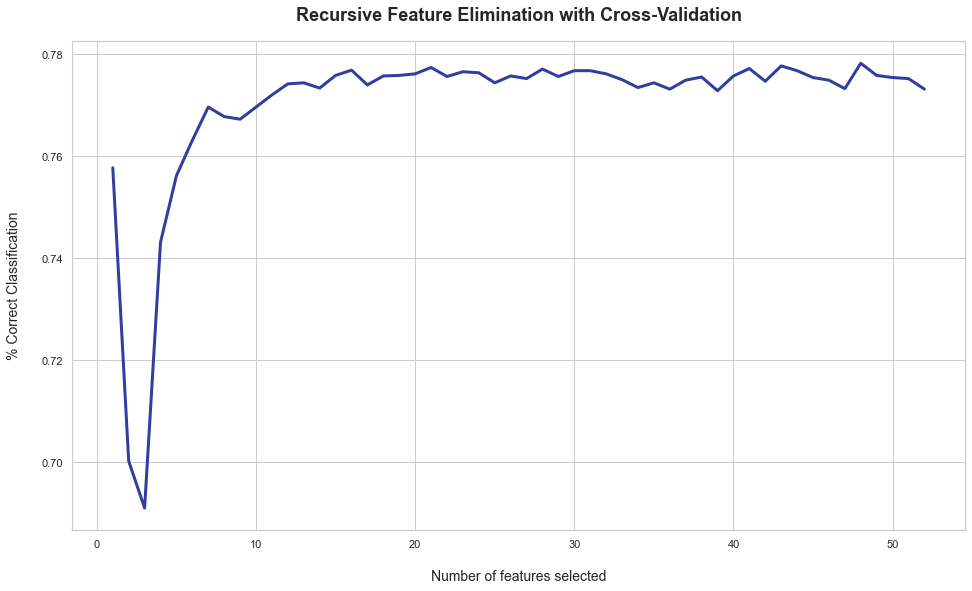

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
print(np.where(rfecv.support_ == False)[0])

auth_features.drop(auth_features.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[21 41 42 43]


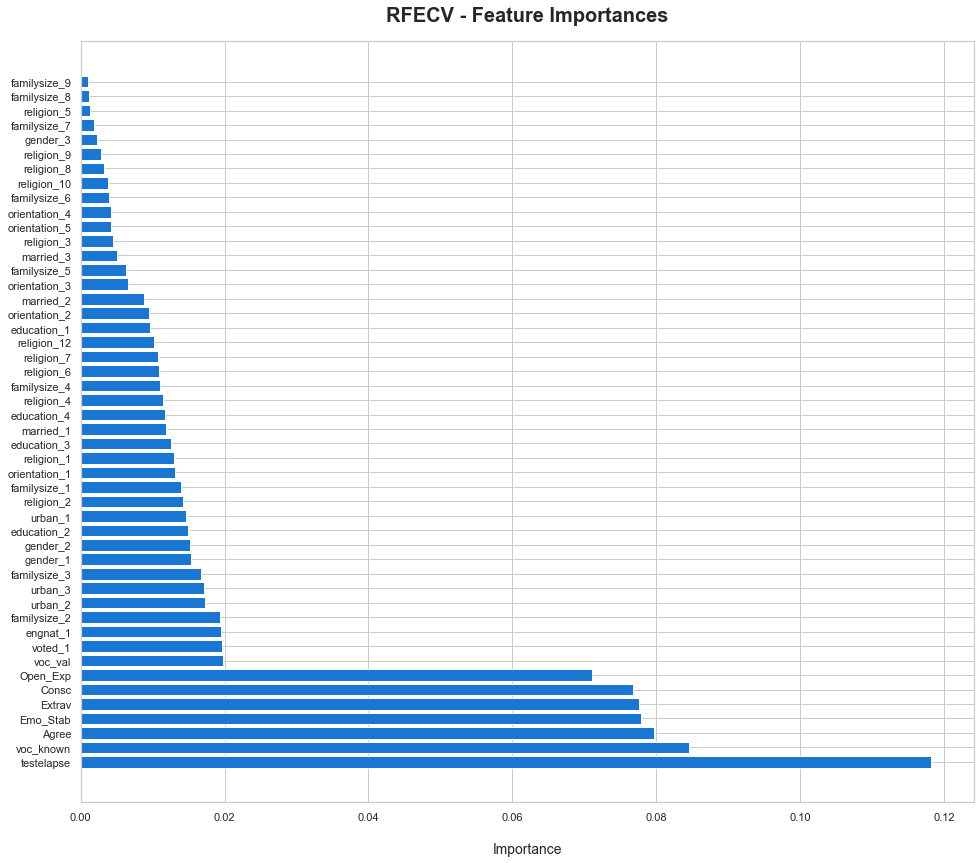

In [ ]:
dset = pd.DataFrame()
dset['attr'] = auth_features.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

Every time I have run this data, 'voc_known' and 'testelapse' have come out ahead of the "Big Five" columns.  But the "Big Five" are always clustered together right behind those two.  While I would like to analyze 'voc_known' and 'testelapse', unfortunately I have already committed to looking the just the "Big Five" in my research proposal. 

Whether or not the test-taker passed the validity test ('voc_val') plus knew quite a few vocabulary words ('voc_known') might be an extra powerful combined feature.  

Let's take a look at the personality tests.

First, to test my hypothesis that having below (population) median scores on any or all of the "Big Five" personality measures will have a statistically significant effect on whether or not a person scores above the 75th percentile on the RWAS, we will create new columns to capture when a person is below the (population) median score in any of the "Big Five".  

Next, a chi-squared contingency test will indicate whether being below the median score in all of the Big Five has a statistically significant association with being highly authoritarian.

In [ ]:
## The code below creates the necessary columns for our upcoming crosstab.
auth['Low_Extrav'] = np.where(auth['Extrav'] < 7, 1, 0).astype(str)
auth['Low_Agree'] = np.where(auth['Agree'] < 7, 1, 0).astype(str)
auth['Low_Consc'] = np.where(auth['Consc'] < 7, 1, 0).astype(str)
auth['Low_Emo_Stab'] = np.where(auth['Emo_Stab'] < 7, 1, 0).astype(str)
auth['Low_Open_Exp'] = np.where(auth['Open_Exp'] < 7, 1, 0).astype(str)

auth['Low_Big_Five'] = auth['Low_Extrav'] + auth['Low_Agree'] + auth['Low_Consc'] + auth['Low_Emo_Stab'] + auth['Low_Open_Exp']

In [ ]:
crosstab = pd.crosstab(auth['Low_Big_Five'], auth['High_RWAS'])
crosstab

High_RWAS,0,1
Low_Big_Five,,
00000,1345,368
00001,35,17
00010,323,120
00011,15,9
00100,290,52
00101,14,7
00110,201,50
00111,9,5
01000,393,164


In [ ]:
chi2, p, degrees_freedom, expected = stats.chi2_contingency(crosstab)
print(p)
print(p < .05)

3.302614848938392e-15
True


We got a very low p-value from the chi-squared contingency test, indicating a statistically significant effect.  We reject the null hypothesis that there is no association between being low on the "Big Five" as a whole and being "highly authoritarian."

Next, we'll use Cramer's V to test for effect-size.

In [ ]:
def get_cramer_v(x, y):
    n = len(x)
    cont_table = pd.crosstab(x, y)
    chi_2 = stats.chi2_contingency(cont_table, correction=False)[0]
    v = np.sqrt(chi_2 / (n * (np.min(cont_table.shape) - 1)))
    return v

get_cramer_v(auth['Low_Big_Five'], auth['High_RWAS'])

0.11887074655516829

The Cramer's V value above is just above .1, the threshold for minimal reasonable effect.  Let's check the chi-squared contigency tables for each pairing of the Big Five against being highly authoritarian.

In [ ]:
auth['Low_E_A'] = auth['Low_Extrav'] + auth['Low_Agree']
auth['Low_E_C'] = auth['Low_Extrav'] + auth['Low_Consc']
auth['Low_E_Em'] = auth['Low_Extrav'] + auth['Low_Emo_Stab']
auth['Low_E_O'] = auth['Low_Extrav'] + auth['Low_Open_Exp']

auth['Low_A_C'] = auth['Low_Agree'] + auth['Low_Consc']
auth['Low_A_Em'] = auth['Low_Agree'] + auth['Low_Emo_Stab']
auth['Low_A_O'] = auth['Low_Agree'] + auth['Low_Open_Exp']

auth['Low_C_Em'] = auth['Low_Consc'] + auth['Low_Emo_Stab']
auth['Low_C_O'] = auth['Low_Consc'] + auth['Low_Open_Exp']

auth['Low_Em_O'] = auth['Low_Emo_Stab'] + auth['Low_Open_Exp']


crosstab_e_a = pd.crosstab(auth['Low_E_A'], auth['High_RWAS'])
crosstab_e_c = pd.crosstab(auth['Low_E_C'], auth['High_RWAS'])
crosstab_e_em = pd.crosstab(auth['Low_E_Em'], auth['High_RWAS'])
crosstab_e_o = pd.crosstab(auth['Low_E_O'], auth['High_RWAS'])

crosstab_a_c = pd.crosstab(auth['Low_A_C'], auth['High_RWAS'])
crosstab_a_em = pd.crosstab(auth['Low_A_Em'], auth['High_RWAS'])
crosstab_a_o = pd.crosstab(auth['Low_A_O'], auth['High_RWAS'])

crosstab_c_em = pd.crosstab(auth['Low_C_Em'], auth['High_RWAS'])
crosstab_c_o = pd.crosstab(auth['Low_C_O'], auth['High_RWAS'])

crosstab_em_o = pd.crosstab(auth['Low_Em_O'], auth['High_RWAS'])


_, p_e_a, _, _ = stats.chi2_contingency(crosstab_e_a)
_, p_e_c, _, _ = stats.chi2_contingency(crosstab_e_c)
_, p_e_em, _, _ = stats.chi2_contingency(crosstab_e_em)
_, p_e_o, _, _ = stats.chi2_contingency(crosstab_e_o)

_, p_a_c, _, _ = stats.chi2_contingency(crosstab_a_c)
_, p_a_em, _, _ = stats.chi2_contingency(crosstab_a_em)
_, p_a_o, _, _ = stats.chi2_contingency(crosstab_a_o)

_, p_c_em, _, _ = stats.chi2_contingency(crosstab_c_em)
_, p_c_o, _, _ = stats.chi2_contingency(crosstab_c_o)

_, p_em_o, _, _ = stats.chi2_contingency(crosstab_em_o)


reject_h0_pair, _, _, _ = multipletests([p_e_a, p_e_c, p_e_em, p_e_o, p_a_c, p_a_em, p_a_o, p_c_em, p_c_o, p_em_o])
reject_h0_pair

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

So, each pairing of low scores has a statistically significant effect on being high RWAS.  Let's check the effect size, however.

In [ ]:
print(get_cramer_v(auth['Low_E_A'], auth['High_RWAS']))
print(get_cramer_v(auth['Low_E_C'], auth['High_RWAS']))
print(get_cramer_v(auth['Low_E_Em'], auth['High_RWAS']))
print(get_cramer_v(auth['Low_E_O'], auth['High_RWAS']))

print(get_cramer_v(auth['Low_A_C'], auth['High_RWAS']))
print(get_cramer_v(auth['Low_A_Em'], auth['High_RWAS']))
print(get_cramer_v(auth['Low_A_O'], auth['High_RWAS']))

print(get_cramer_v(auth['Low_C_Em'], auth['High_RWAS']))
print(get_cramer_v(auth['Low_C_O'], auth['High_RWAS']))

print(get_cramer_v(auth['Low_Em_O'], auth['High_RWAS']))

0.06066726585814312
0.05509725205700413
0.03902820974739878
0.08102998383465375
0.06908309591206266
0.047103711659205516
0.07945309489399341
0.053670264520359987
0.0843366855942128
0.06963207036291282


None of the Cramer's V values for the effect sizes for any of the pairings passes the .1 threshold for minimal significance.

Next, let's look at the contingency tables for scoring low in individual personality domains.

In [ ]:
crosstab_e = pd.crosstab(auth['Low_Extrav'], auth['High_RWAS'])
crosstab_a = pd.crosstab(auth['Low_Agree'], auth['High_RWAS'])
crosstab_c = pd.crosstab(auth['Low_Consc'], auth['High_RWAS'])
crosstab_em = pd.crosstab(auth['Low_Emo_Stab'], auth['High_RWAS'])
crosstab_op = pd.crosstab(auth['Low_Open_Exp'], auth['High_RWAS'])



_, p_e, _, _ = stats.chi2_contingency(crosstab_e)
_, p_a, _, _ = stats.chi2_contingency(crosstab_a)
_, p_c, _, _ = stats.chi2_contingency(crosstab_c)
_, p_em, _, _ = stats.chi2_contingency(crosstab_em)
_, p_op, _, _ = stats.chi2_contingency(crosstab_op)


reject_h0_sin, _, _, _ = multipletests([p_e, p_a, p_c, p_em, p_op])
reject_h0_sin

array([ True,  True,  True, False,  True])

Low scores in all personality domains except Emotional Stability appear to have a statistically significant effect on being highly authoritarian.  

Now, let's look at individual effect sizes.

In [ ]:
print(get_cramer_v(auth['Low_Extrav'], auth['High_RWAS']))
print(get_cramer_v(auth['Low_Consc'], auth['High_RWAS']))
print(get_cramer_v(auth['Low_Emo_Stab'], auth['High_RWAS']))
print(get_cramer_v(auth['Low_Agree'], auth['High_RWAS']))
print(get_cramer_v(auth['Low_Open_Exp'], auth['High_RWAS']))

0.030064590864440105
0.04743024636756329
0.01341354743887218
0.04539233233491176
0.06833698347007333


None of these effect sizes is large enough for mention.  They are in fact even smaller on average than the effect sizes for the pairings.  Predictably, the effect size for low Emotional Stability is the very smallest we have seen so far -- it is not even a statistically significant factor.

Clearly, one has to consider more factors than just low scores on the personality domains when trying to determine whether or not someone has a higher chance to become authoritarian.